<a href="https://colab.research.google.com/github/ramyasnl/Machine_Learning_Beginners_MS/blob/main/Logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression to predict categories


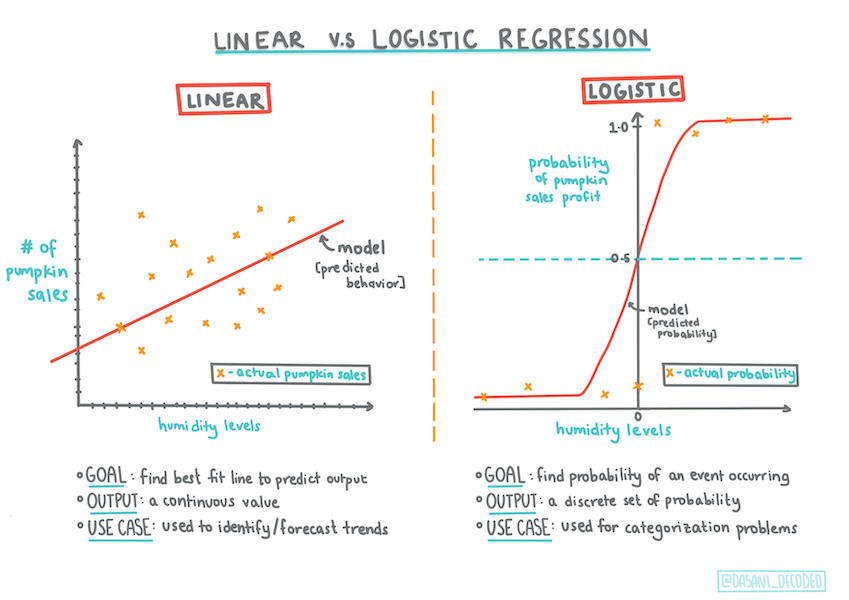

## Notes:
1.Use Logistic Regression to predict whether an apple is ripe or not</br>
2.Types of Logistic Regression include multinomial and ordinal</br>
* Multinomial logistic regression is used to predict categorical placement in or the probability of category membership on a dependent variable based on multiple independent variables. The independent variables can be either dichotomous (i.e., binary) or continuous (i.e., interval or ratio in scale).
* Ordinal logistic regression (often just called 'ordinal regression') is used to predict an ordinal dependent variable given one or more independent variables. ... You will also be able to determine how well your ordinal regression model predicts the dependent variable.
3.Your data has weak correlations. The best type of Regression to use    is:Logistic</br>


## Introduction
In this final lesson on Regression, one of the basic classic ML techniques, we will take a look at Logistic Regression. You would use this technique to discover patterns to predict binary categories. Is this candy chocolate or not? Is this disease contagious or not? Will this customer choose this product or not?

In this lesson, you will learn:

A new library for data visualization
Techniques for logistic regression
✅ Deepen your understanding of working with this type of regression in this Learn module
## Prerequisite
Having worked with the pumpkin data, we are now familiar enough with it to realize that there's one binary category that we can work with: Color.

<b>Let's build a logistic regression model to predict that, given some variables, what color a given pumpkin is likely to be (orange 🎃 or white 👻).</b>

Why are we talking about binary classification in a lesson grouping about regression? Only for linguistic convenience, as logistic regression is really a classification method, albeit a linear-based one. Learn about other ways to classify data in the next lesson group.

## Define the question
For our purposes, we will express this as a binary: 'Orange' or 'Not Orange'. There is also a 'striped' category in our dataset but there are few instances of it, so we will not use it. It disappears once we remove null values from the dataset, anyway.

🎃 Fun fact, we sometimes call white pumpkins 'ghost' pumpkins. They aren't very easy to carve, so they aren't as popular as the orange ones but they are cool looking!

## About logistic regression
Logistic regression differs from linear regression, which you learned about previously, in a few important ways.

## Binary classification
Logistic regression does not offer the same features as linear regression. The former offers a prediction about a binary category ("orange or not orange") whereas the latter is capable of predicting continual values, for example given the origin of a pumpkin and the time of harvest, how much its price will rise.

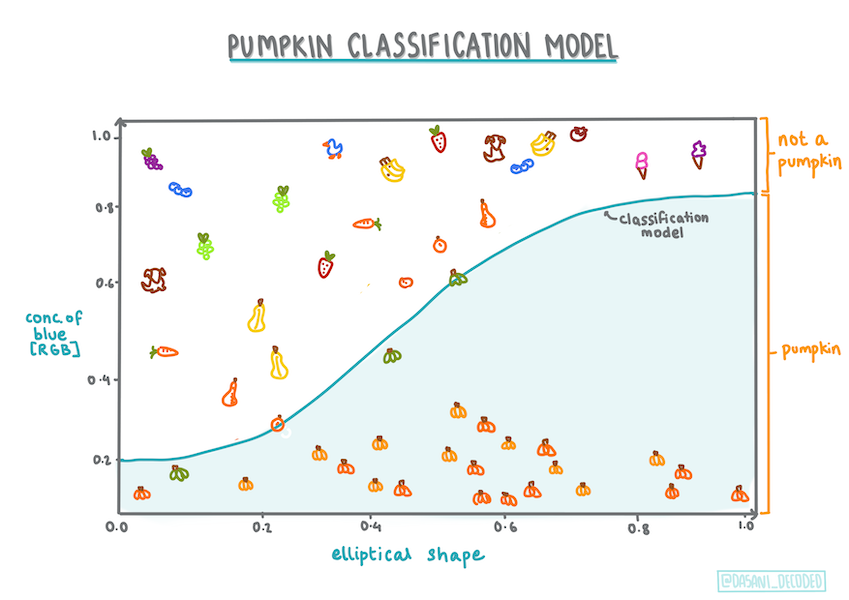

## Other classifications
There are other types of logistic regression, including multinomial and ordinal:

Multinomial, which involves having more than one category - "Orange, White, and Striped".
Ordinal, which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini,sm,med,lg,xl,xxl).

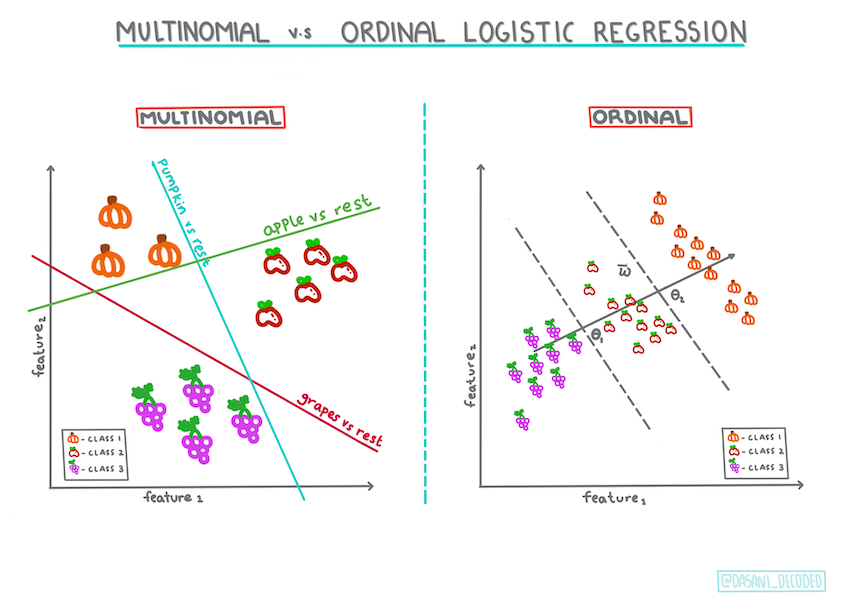

## It's still linear
Even though this type of Regression is all about 'category predictions', it still works best when there is a clear linear relationship between the dependent variable (color) and the other independent variables (the rest of the dataset, like city name and size). It's good to get an idea of whether there is any linearity dividing these variables or not.

## Variables DO NOT have to correlate
Remember how linear regression worked better with more correlated variables? <b>Logistic regression is the opposite - the variables don't have to align. That works for this data which has somewhat weak correlations.</b>

## You need a lot of clean data
Logistic regression will give more accurate results if you use more data; our small dataset is not optimal for this task, so keep that in mind.

✅ Think about the types of data that would lend themselves well to logistic regression

## Exercise - tidy the data
First, clean the data a bit, dropping null values and selecting only some of the columns:



In [1]:
#Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pumpkins = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv', error_bad_lines=False)

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [4]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

#new_pumpkins.dropna(inplace=True)

#new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [6]:
new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
0,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
1,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE


In [7]:
new_pumpkins.dropna(inplace=True)
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


In [8]:
new_pumpkins.tail()

,City Name,Package,Variety,Origin,Item Size,Color
1694,12,3,5,4,6,1
1695,12,3,5,4,6,1
1696,12,3,5,4,6,1
1697,12,3,5,4,6,1
1698,12,3,5,4,6,1


In [9]:
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

## Visualization - side-by-side grid
By now you have loaded up the starter notebook with pumpkin data once again and cleaned it so as to preserve a dataset containing a few variables, including Color. Let's visualize the dataframe in the notebook using a different library: Seaborn, which is built on Matplotlib which we used earlier.

Seaborn offers some neat ways to visualize your data. For example, you can compare distributions of the data for each point in a side-by-side grid.

1.Create such a grid by instantiating a PairGrid, using our pumpkin data new_pumpkins, followed by calling map():

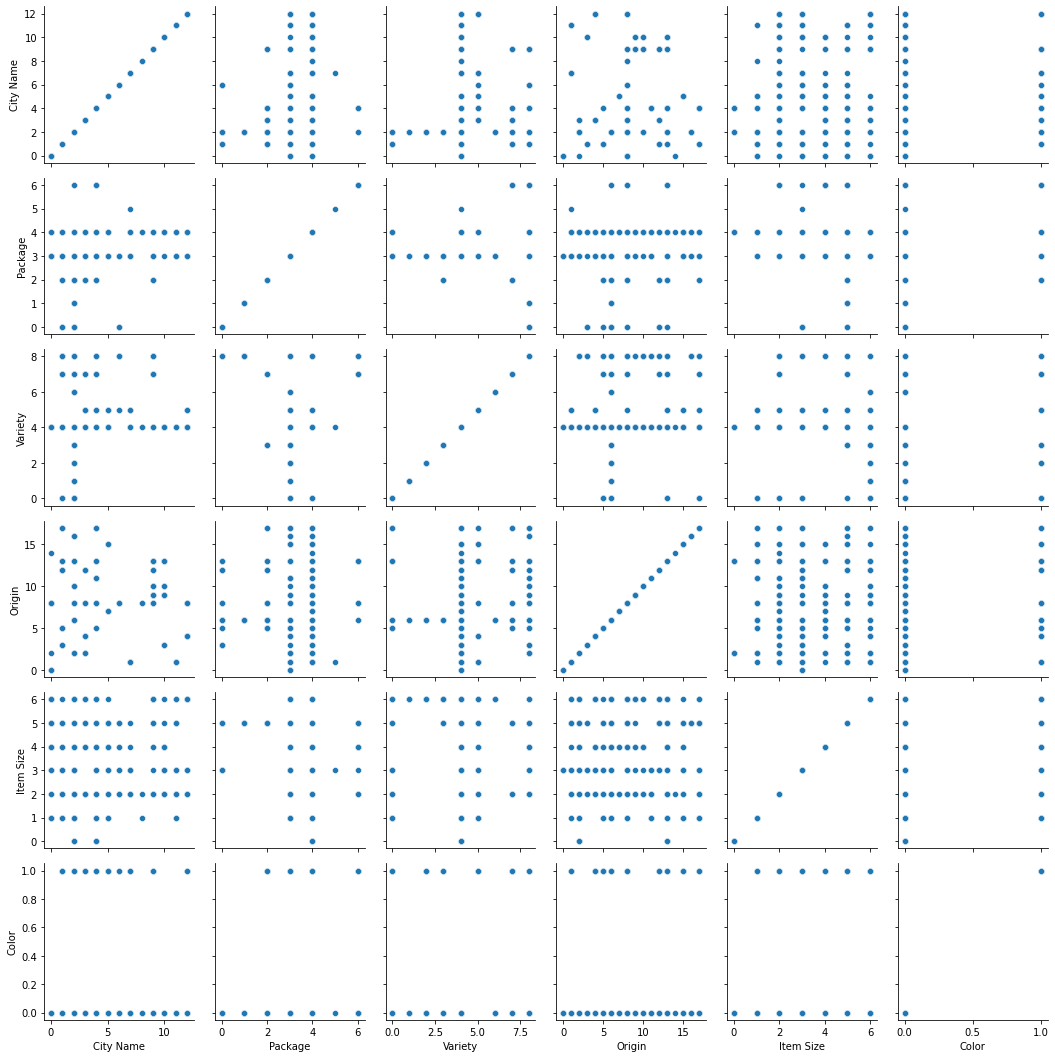

In [10]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)


By observing data side-by-side, you can see how the Color data relates to the other columns.

✅ Given this scatterplot grid, what are some interesting explorations you can envision?

## Use a swarm plot
Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables.

You can visualize variables side-by-side with Seaborn plots.

Try a 'swarm' plot to show the distribution of values:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


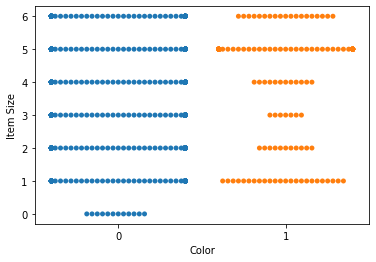

In [11]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

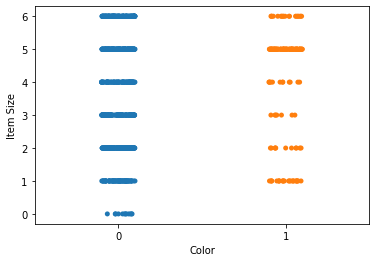

In [12]:
sns.stripplot(x="Color", y="Item Size", data=new_pumpkins)

## Violin plot
A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.



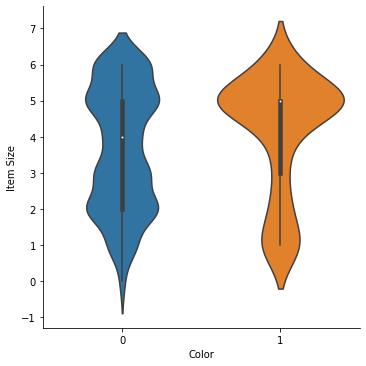

In [13]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

✅ Try creating this plot, and other Seaborn plots, using other variables.

Now that we have an idea of the relationship between the binary categories of color and the larger group of sizes, let's explore logistic regression to determine a given pumpkin's likely color.

🧮 Show Me The Math

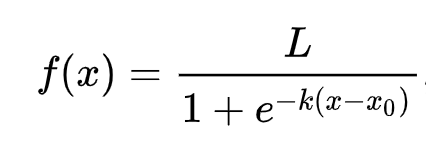
Remember how linear regression often used ordinary least squares to arrive at a value? Logistic regression relies on the concept of 'maximum likelihood' using sigmoid functions. A 'Sigmoid Function' on a plot looks like an 'S' shape. It takes a value and maps it to somewhere between 0 and 1. Its curve is also called a 'logistic curve'. Its formula looks like thus:

## logistic function

where the sigmoid's midpoint finds itself at x's 0 point, L is the curve's maximum value, and k is the curve's steepness. If the outcome of the function is more than 0.5, the label in question will be given the class '1' of the binary choice. If not, it will be classified as '0'.

In [14]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


## Better comprehension via a confusion matrix
While you can get a scoreboard report terms by printing out the items above, you might be able to understand your model more easily by using a confusion matrix to help us understand how the model is performing.

🎓 A 'confusion matrix' (or 'error matrix') is a table that expresses your model's true vs. false positives and negatives, thus gauging the accuracy of predictions.

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

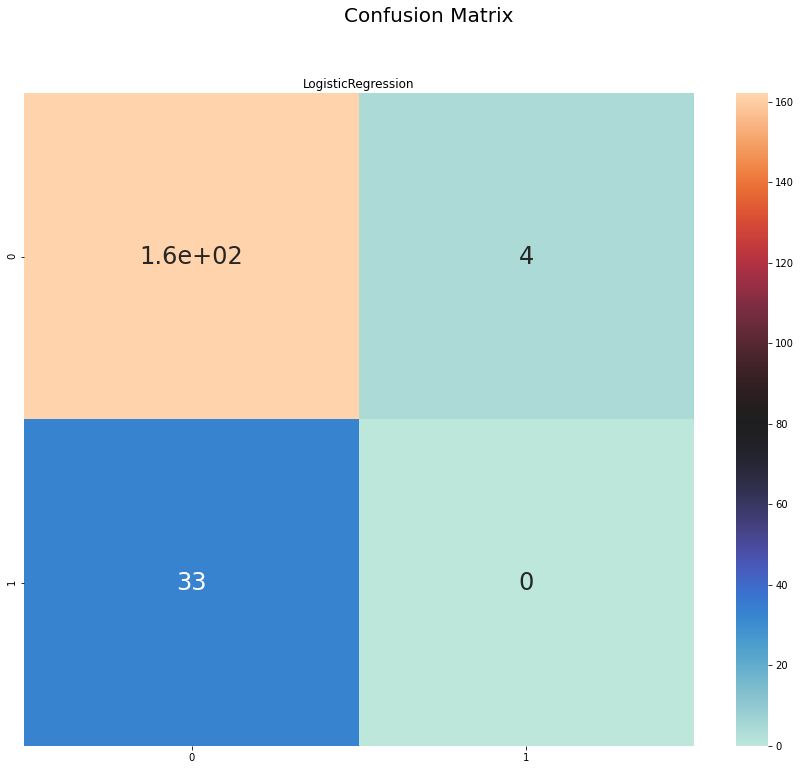

In [17]:
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrix",fontsize=20)
# plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
# plt.subplot(2,2,1)
plt.title("LogisticRegression")
sns.heatmap(confusion_matrix(y_test, predictions),cmap="icefire",cbar=True, annot=True,annot_kws={"size": 24})

## What's going on here? Let's say our model is asked to classify items between two binary categories, category 'pumpkin' and category 'not-a-pumpkin'.

If your model predicts something as a pumpkin and it belongs to category 'pumpkin' in reality we call it a true positive, shown by the top left number.
If your model predicts something as not a pumpkin and it belongs to category 'pumpkin' in reality we call it a false positive, shown by the top right number.
If your model predicts something as a pumpkin and it belongs to category 'not-a-pumpkin' in reality we call it a false negative, shown by the bottom left number.
If your model predicts something as not a pumpkin and it belongs to category 'not-a-pumpkin' in reality we call it a true negative, shown by the bottom right number.
## Confusion Matrix
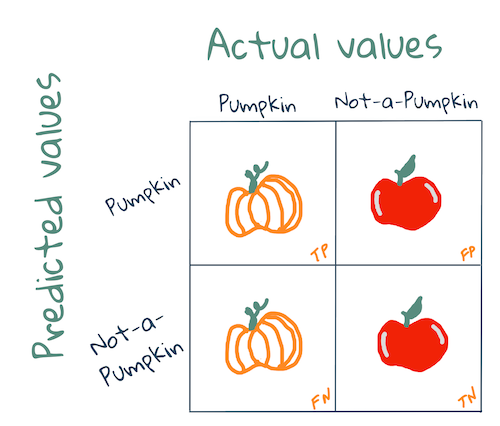


Infographic by Jen Looper

As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

✅ Q: According to the confusion matrix, how did the model do? A: Not too bad; there are a good number of true positives but also several false negatives.

Let's revisit the terms we saw earlier with the help of the confusion matrix's mapping of TP/TN and FP/FN:

🎓 Precision: TP/(TP + FN) The fraction of relevant instances among the retrieved instances (e.g. which labels were well-labeled)

🎓 Recall: TP/(TP + FP) The fraction of relevant instances that were retrieved, whether well-labeled or not

🎓 f1-score: (2 * precision * recall)/(precision + recall) A weighted average of the precision and recall, with best being 1 and worst being 0

🎓 Support: The number of occurrences of each label retrieved

🎓 Accuracy: (TP + TN)/(TP + TN + FP + FN) The percentage of labels predicted accurately for a sample.

🎓 Macro Avg: The calculation of the unweighted mean metrics for each label, not taking label imbalance into account.

🎓 Weighted Avg: The calculation of the mean metrics for each label, taking label imbalance into account by weighting them by their support (the number of true instances for each label).

✅ Can you think which metric you should watch if you want your model to reduce the number of false negatives?

## Visualize the ROC curve of this model
### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.
This is not a bad model; its accuracy is in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables.

Let's do one more visualization to see the so-called 'ROC' score:

from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)
Using Seaborn again, plot the model's Receiving Operating Characteristic or ROC. ROC curves are often used to get a view of the output of a classifier in terms of its true vs. false positives. "ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis." <b>Thus, the steepness of the curve and the space between the midpoint line and the curve matter: you want a curve that quickly heads up and over the line. In our case, there are false positives to start with, and then the line heads up and over properly:</b>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Receiver Operating Characteristic curve')

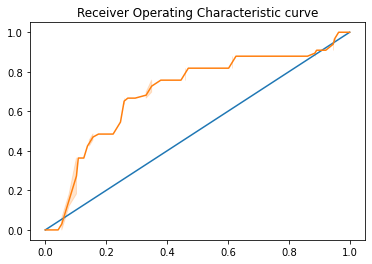

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr,tpr).set_title("Receiver Operating Characteristic curve")


In [19]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


The result is 0.6976998904709748. Given that the AUC ranges from 0 to 1, you want a big score, since a model that is 100% correct in its predictions will have an AUC of 1; in this case, the model is pretty good.

In future lessons on classifications, you will learn how to iterate to improve your model's scores. But for now, congratulations! You've completed these regression lessons!

